<h1
    style='text-align:center;font-weight: bolder;'
    >
    Econometría.
</h1>
<p
   style='text-align:center;margin-top:-20px;margin-left:-35px;font-weight: bolder'
   > Gujarati - Porter
</p>

**Econometría** : Medición económica.

<i style='text-align:justify;'>
"La econometría puede definirse como el análisis cuantitativo de fenómenos económicos reales,
basados en el desarrollo simultáneo de la teoría y la observación, relacionados mediante métodos
apropiados de inferencia."
</i>
<br/><br/>
<i style='text-align: justify;'>
"La econometría se defi ne como la ciencia social en la cual las herramientas de la teoría económica,
las matemáticas y la inferencia estadística se aplican al análisis de los fenómenos económicos."
</i>

**Econometría** = Teoría económica **+** Economía matemática **+** Estadística económica y matemática

## Metodología clásica.

<ol>
    <li>Planteamiento de la teoría o hipótesis.</li>
    <li>Especificación del modelo matemático de la teoría.</li>
    <li>Especificación del modelo econométrico o estadístico de la teoría.</li>
    <li>Obtención de datos.</li>
    <li>Estimación de los parámetros del modelo econométrico.</li>
    <li>Pruebas de hipótesis.</li>
    <li>Pronóstico o predicción.</li>
    <li>Utilización del modelo.</li>
</ol>

## **1. Modelos de Regresión uniecuacionales.**

### I. Naturaleza del análisis de regresión.

<p style='text-align:justify;'>
El análisis de regresión trata del estudio de la dependencia de una variable (variable dependiente)
respecto de una o más variables (variables explicativas) con el objetivo de estimar o predecir la media
o valor promedio poblacional de la primera en términos de los valores conocidos o fijos (en muestras
repetidas) de las segundas.
</p>
<p style='text-align:justify;'>
A pesar de que el análisis de regresión tiene que ver con la dependencia de una variable respecto de otros variables, esto no implica <strong><i>causalidad</i></strong> necesariamente.
</p>
<strong>Regresión y causalidad.</strong><br/>
<i>
“Una relación estadística, por más fuerte y sugerente que sea, nunca podrá establecer una conexión causal: nuestras ideas de causalidad deben provenir de estadísticas externas y, en último
término, de una u otra teoría”.
</i>

#### **Tipos de datos**

<ol>
    <li>
        <strong>Datos de series de tiempo.</strong> Una <i>serie de tiempo</i> es un conjunto de
        observaciones sobre los valores de una variable en distintos momentos. La información debe 
        recopilarse en intervalos regulares. 
    </li>
    <br>
    <li>
        <strong>Datos transversales. </strong> Son datos de una o más variables recopilados en el mismo 
        punto del tiempo.
    </li>
    <br>
    <li>
        <strong>Datos combinados.</strong> Reunen elementos de series de tiempo y datos 
        transversales.
        <ul>
            <li>
                <strong>Datos de Panel.</strong> Se estudia a través del tiempo la misma unidad 
                transversal.
            </li>
        </ul>
    </li>
</ol>

### II. Análisis de regresión con dos variables: algunas ideas básicas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

#### **Función de regresión poblacional (FRP)**

Estos datos se refieren a la población total de 60 familias de una comunidad hipotética, así como a su ingreso semanal (X) y su gasto de consumo semanal(Y), en dólares.

In [3]:
df = pd.DataFrame({
    80: [55, 60, 65, 70, 75, np.nan, np.nan],
    100: [65, 70, 74, 80, 85, 88, np.nan],
    120: [79, 84, 90, 94, 98, np.nan, np.nan],
    140: [80, 93, 95, 103, 108, 113, 115],
    160: [102, 107, 110, 116, 118, 125, np.nan],
    180: [110, 115, 120, 130, 135, 140, np.nan],
    200: [120, 136, 140, 144, 145, np.nan, np.nan],
    220: [135, 137, 140, 152, 157, 160, 162],
    240: [137, 145, 155, 165, 175, 189, np.nan],
    260: [150, 152, 175, 178, 180, 185, 191]
})
df

,80,100,120,140,160,180,200,220,240,260
0,55.0,65.0,79.0,80,102.0,110.0,120.0,135,137.0,150
1,60.0,70.0,84.0,93,107.0,115.0,136.0,137,145.0,152
2,65.0,74.0,90.0,95,110.0,120.0,140.0,140,155.0,175
3,70.0,80.0,94.0,103,116.0,130.0,144.0,152,165.0,178
4,75.0,85.0,98.0,108,118.0,135.0,145.0,157,175.0,180
5,NaN,88.0,NaN,113,125.0,140.0,NaN,160,189.0,185
6,NaN,NaN,NaN,115,NaN,NaN,NaN,162,NaN,191


In [4]:
promedio = []

for i in list(df):
    promedio.append(df.describe()[i]['mean'])

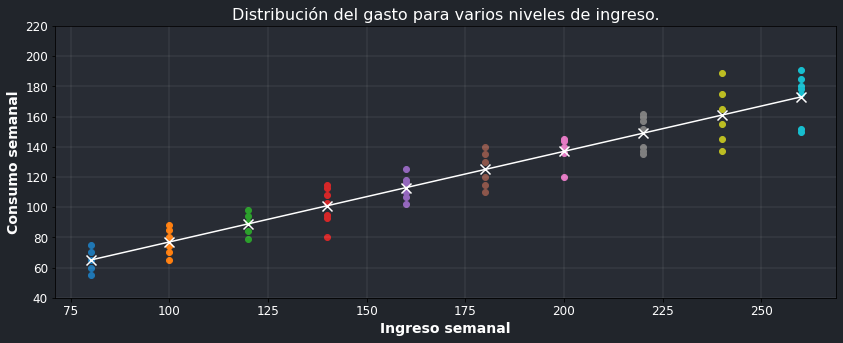

In [6]:
fig, ax = plt.subplots(figsize=(14,5))

plt.title('Distribución del gasto para varios niveles de ingreso.', size=16, color='white')
plt.grid(visible=True, linewidth=0.1, color='white')
fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

for i in list(df):
    plt.scatter(x=[i for j in range(7)], y=df[i])

plt.scatter(list(df), promedio, marker='x', s=100, color='white')
plt.plot(list(df), promedio, color='white')

plt.xlabel('Ingreso semanal', size=14, weight=700, color='white')
plt.xticks(color='white', size=12)

plt.ylabel('Consumo semanal', size=14, weight=700, color='white')
plt.yticks(color='white', size=12)
plt.ylim(40, 220)

plt.show()

El panorama general es que, a pesar de la variabilidad del consumo semanal en cada nivel de ingreso considerado, en promedio, el consumo semanal se incrementa a medida que aumenta el ingreso. 

En total hay 10 valores medios para las 10 subpoblaciones de Y. A estos valores medios se les llama **valores esperados condicionales**, en virtud de que dependen de los valores de la variable (condicional) X. En forma simbólica, se denotan con E(Y | X ), lo cual se lee como el valor esperado de Y, dado el valor de X.

Al unir los valores medios condicionales de Y obtenemos nuestra linea de regresión poblacional.

De igual forma nos damos cuenta que cada media condicional E(Y|X) esta en función de X

$$E(Y|X_i) = f(X_i)$$

Aquí nos damos cuenta del poder de la regresión, si conocemos la información del nivel de ingresos de los hogares será mucho más preciso calcular el gasto promedio con base a este, que simplemente calcular el valor promedio general (o valor espetado) de la muestra.

Si asumieramos que el consumo tiene una relación lineal con el ingreso podriamos empezar a darle forma a nuestra función.

$$E(Y|X_i) = \beta_1 + \beta_2*X_i$$

Donde los betas representan los coeficientes de regresión (intersección y pendiente) y X es nuestra variable explicativa.

El objetivo final del **análisis de regresión** es estimar el valor de estos parámetros de la manera que mejor se adapten a nuestros datos.

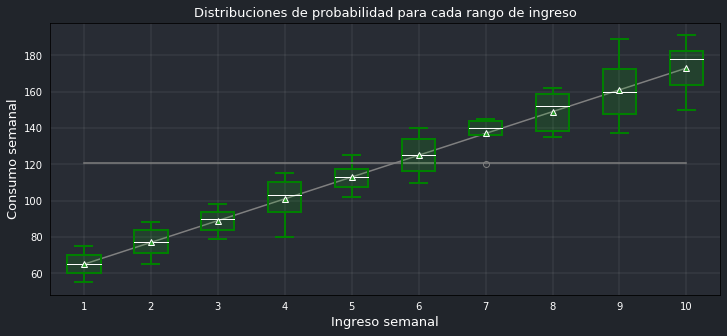

In [7]:
data = [df[i].dropna() for i in list(df)]

fig, ax = plt.subplots(figsize=(12, 5))
plt.title('Distribuciones de probabilidad para cada rango de ingreso', color='white', size= 13)
fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 
plt.grid(visible=True, linewidth=0.1, color='white')

plt.xlabel('Ingreso semanal', color='white', size=13)
plt.ylabel('Consumo semanal', color='white', size=13)

ax.tick_params(axis='x', which='both', colors='#21252b')
ax.tick_params(axis='y', which='both', colors='#21252b')

plt.xticks(color='white')
plt.yticks(color='white')

c='green'

plt.boxplot(
    data, 
    showmeans=True,
    patch_artist=True,
    boxprops=dict(color=c, linewidth=2, facecolor=(0, 1, 0, 0.1)),
    capprops=dict(color=c, linewidth=2),
    whiskerprops=dict(color=c, linewidth=2),
    flierprops=dict(markeredgecolor='gray'),
    medianprops=dict(color='white'),
    meanprops=dict(markeredgecolor='white')
)

values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(values, promedio, color='gray')
plt.plot(values, [121 for i in values], color='gray')

plt.show()

En esta gráfica podemos observar la gran diferencia entre el promedio general del consumo ($121) y el valor del promedio dado un nivel de ingreso familiar. En algunos casos, la diferencia es abismal.

La diferencia entre estos valores puede verse de la siguiente manera:

$$u_i = Y_i - E(Y|X_i)$$

Con lo que podemos llegar a: 
$$Y_i = E(Y|X_i) + u_i$$

Donde *u* seria una variable alatoria no observable que captura aquellos datos que no estamos incluyendo dentro de nuestro modelo. Se conoce ***perturbación estocastica*** o ***termino de error***.

Por lo tanto nuestro modelo constaria de dos componentes, uno ***determinista***, que viene determinado por la media del consumo de los hogares con el mismo nivel de ingreso. Y un componente ***estocastico*** que sintetiza las variables no observadas.

Al final nuestro modelo se veria de la siguiente manera:

$$Y_i = \beta_1 + (\beta_2*X_i) + u_i$$ 

**¿Cuál es el valor esperado del error?**

Si tomamos nuestra ecuación:

$$Y_i = E(Y|X_i) + u_i$$

Y calculamos el valor esperado en ambos lados nos quedamos con:

$$E(Y_i|X_i) = E[E(Y|X_i)|X_i] + E(u_i|X_i)$$

Resolviendo esto nos quedamos con:

$$E(Y_i|X_i) = E(Y|X_i) + E(u_i|X_i)$$
$$E(u_i|X_i) = E(Y_i|X_i) - E(Y|X_i)$$
$$E(u_i|X_i) = 0$$

Recordemos que al final, el **valor esperado** no es más que un promedio. Esta demostración ilustra que al final, el promedio de los terminos de error para diferentes niveles del ingreso es de cero, por lo que no afectara nuestra **recta regresora**.

#### **Función de regresión Muestral (FRM)**

Supongamos que para los datos del ejercicio anterior ya no contamos con la población sino con un conjunto de muestras. 

In [8]:
m1 = pd.DataFrame({
    'Y': [70, 65, 90, 95, 110, 115, 120, 140, 155, 150],
    'X': [80, 100, 120, 140, 160, 180, 200, 220, 240, 260]
})

m2 = pd.DataFrame({
    'Y': [55, 88, 90, 80, 118, 120, 145, 135, 145, 175],
    'X': [80, 100, 120, 140, 160, 180, 200, 220, 240, 260]
})

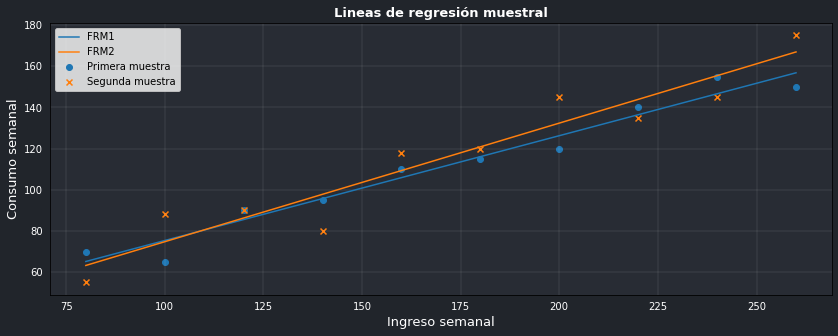

In [9]:
fig, ax = plt.subplots(figsize=(14, 5))
plt.title('Lineas de regresión muestral', color='white', size=13, weight=1000)

# Configuración de estolos
fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 
plt.grid(visible=True, linewidth=0.1, color='white')

ax.tick_params(axis='x', which='both', colors='#21252b')
ax.tick_params(axis='y', which='both', colors='#21252b')

plt.xticks(color='white')
plt.yticks(color='white')

# Pintando nuestras gráficas
m, b = np.polyfit(m1['X'], m1['Y'], 1)
plt.plot(m1['X'], [m*i for i in m1['X'] ] + b, label='FRM1')
plt.scatter(x=m1['X'], y=m1['Y'], label='Primera muestra', marker='o')

m, b = np.polyfit(m2['X'], m2['Y'], 1)
plt.plot(m2['X'], [m*i for i in m2['X']] + b, label='FRM2')
plt.scatter(x=m2['X'], y=m2['Y'], label='Segunda muestra', marker='x')

plt.xlabel('Ingreso semanal', color='white', size=13)
plt.ylabel('Consumo semanal', color='white', size=13)

plt.legend()

plt.show()

Cuando trabajamos con muestras de nuestra población vamos a obtener diferentes funciones de regresión para cada una de ellas.

Y en este caso nuestra ecuación, la **función de regresión muestral**, se veria de la siguiente forma:

$$\hat{Y} = \hat{\beta_1} + (\hat{\beta_2} * X_i)$$

o de la forma estocástica: 

$$\hat{Y} = \hat{\beta_1} + (\hat{\beta_2} * X_i) + \hat{u_i}$$


Donde las variables que tienen gorro son estimadores de nuestra población.

El valor obtenido de estas funciones se denomina **estimación**.

De manera que el objetivo final del análisis de regresión es estimar la **Función de Regresión Poblacional (FRP)**

$$Y = \beta_1 + (\beta_2 * X_i) + u_i$$

dada la **Función de Regresión Muestral (FRM)**

$$\hat{Y} = \hat{\beta_1} + (\hat{\beta_2} * X_i) + \hat{u_i}$$

### III. Modelo de regresión con dos variables: problema de estimación.

#### **Método de Mínimos Cuadrados Ordinarios (MCO)**

Tenemos nuestra FRM

$${Y_i} = \hat{\beta_1} + (\hat{\beta_2} * X_i) + \hat{u_i}$$

que puede ser escrita de la siguiente manera

$${u_i} = Y_i - \hat{\beta_1} - (\hat{\beta_2} * X_i)$$

o de la siguiente:

$${Y_i} = \hat{Y_i} + \hat{u_i}$$

Con esto nos damos cuenta que los residuos son la diferencia entre los valores observados y los estimados:

$$ \hat{u_i} = {Y_i} - \hat{Y_i}$$

Por lo tanto:

$$ \sum\hat{u_i} = \sum({Y_i} - \hat{Y_i})$$

Nuestro objetivo es que la diferencia de las estimaciones sea la miníma con respecto a los valores observados. Sin embargo esta formula tiene un problema, no estamos ponderando con respecto a la diferencia entre la estimación y el valor observado de manera que cuando sumemos los residuos todos tendran el mismo peso.

Para solucionar este problema utilizaremos el **criterio de mínimos cuadrados**

$$ \sum\hat{u_i}^2 = \sum({Y_i} - \hat{Y_i})^2$$

Y por lo tanto:

$$ \sum\hat{u_i}^2 = \sum({Y_i} - \hat{\beta_1} - (\hat{\beta_2} * X_i))^2$$


Esta herramienta matemática nos permite solucionar el problema de la ponderación a la vez que quita los valores negativos resultantes de una sobre o sub estimación de la regresión lo que nos sirve para abordar mejor nuestro ejercicio.

In [39]:
p1 = pd.DataFrame({
    'Y_i': [4, 5, 7 , 12],
    'X_t': [1, 4, 5, 6],
})

betha1_1 = 1.572
betha2_1 = 1.357

betha1_2 = 3
betha2_2 = 1

p1['Y1_est'] = betha1_1 + p1['X_t']*betha2_1
p1['u1_est'] = p1['Y_i'] - p1['Y1_est']
p1['u1_est2'] = p1['u1_est'].apply(lambda x: round(x**2, 3))

p1['Y2_est'] = betha1_2 + p1['X_t']*betha2_2
p1['u2_est'] = p1['Y_i'] - p1['Y2_est']
p1['u2_est2'] = p1['u2_est'].apply(lambda x: round(x**2, 3))

p1

,Y_i,X_t,Y1_est,u1_est,u1_est2,Y2_est,u2_est,u2_est2
0,4,1,2.929,1.071,1.147,4,0,0
1,5,4,7.000,-2.000,4.000,7,-2,4
2,7,5,8.357,-1.357,1.841,8,-1,1
3,12,6,9.714,2.286,5.226,9,3,9


In [40]:
# Suma de los residuos cuadrados para el primer conjunto de parametros
p1['u1_est2'].sum()

12.214

In [41]:
# Suma de los residuos cuadrados para el segundo conjunto de parametros
p1['u2_est2'].sum()

14

Aquí tenemos un ejemplo en el que utilizamos distintos valores para nuestros parámetros que se verán reflejados en diferentes estimaciones. El método de MCO pretende encontrar aquellos estimadores cuya suma de residuos sea la menor. ¿Cómo hacemos eso? Con un ejercicio de cálculo diferencial.

Tenemos que: 

$$ \sum\hat{u_i}^2 = \sum({Y_i} - \hat{\beta_1} - (\hat{\beta_2} * X_i))^2$$

Ahora procedemos a derivar parcialmente con respecto a cada uno de nuestros parametros:

**Betha 1**

$$ \frac{\partial{\sum\hat{u_i}^2}}{\partial{\beta_1}} = \frac{\partial{\sum({Y_i} - \hat{\beta_1} - (\hat{\beta_2} * X_i))^2}}{\partial{\beta_1}} $$

$$ \frac{\partial{\sum\hat{u_i}^2}}{\partial{\beta_1}} = 2*\sum({Y_i} - \hat{\beta_1} - (\hat{\beta_2} * X_i) * -1$$

$$ \frac{\partial{\sum\hat{u_i}^2}}{\partial{\beta_1}} = -2*\sum({Y_i} - \hat{\beta_1} - (\hat{\beta_2} * X_i)$$

$$ \frac{\partial{\sum\hat{u_i}^2}}{\partial{\beta_1}} = -2*\sum({\hat{u_1}})$$

**Betha 2**

$$ \frac{\partial{\sum\hat{u_i}^2}}{\partial{\beta_2}} = \frac{\partial{\sum({Y_i} - \hat{\beta_1} - (\hat{\beta_2} * X_i))^2}}{\partial{\beta_2}} $$

$$ \frac{\partial{\sum\hat{u_i}^2}}{\partial{\beta_2}} = 2*\sum({Y_i} - \hat{\beta_1} - (\hat{\beta_2} * X_i) * -X_1$$

$$ \frac{\partial{\sum\hat{u_i}^2}}{\partial{\beta_2}} = -2X_1*\sum({Y_i} - \hat{\beta_1} - (\hat{\beta_2} * X_i)$$

$$ \frac{\partial{\sum\hat{u_i}^2}}{\partial{\beta_2}} = -2X_1*\sum({\hat{u_1}})$$